In [29]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import psycopg2
import yaml
from sqlalchemy import create_engine
from pylab import rcParams


#!conda config --env --add channels conda-forge
#!conda install numpy -y
#!conda install pandas -y
#!conda install matplotlib -y
rcParams['figure.figsize'] = 12, 10

-  Spotify Million Playlist Dataset Challenge https://www.aicrowd.com/challenges/spotify-million-playlist-dataset-challenge#dataset
- How to Develop an End-to-End Machine Learning Project and Deploy it to Heroku with Flask https://www.freecodecamp.org/news/end-to-end-machine-learning-project-turorial/
- A Full End-to-End Deployment of a Machine Learning Algorithm into a Live Production Environment https://towardsdatascience.com/a-full-end-to-end-deployment-of-a-machine-learning-algorithm-into-a-live-production-environment-3d9971ade188
- Object Oriented Machine Learning — Create Production grade Machine Learning Pipeline using OOPs https://medium.com/analytics-vidhya/object-oriented-machine-learning-create-production-grade-machine-learning-pipeline-using-oops-50f3cfa14659

In [4]:



credentials = yaml.safe_load(open('/home/maksim/Documents/credentials.yml'))
pwd = credentials['maksim']['password']
conn = psycopg2.connect(database="spotify", user="maksim",
    password=pwd, host="localhost")
engine = create_engine('postgresql+psycopg2://maksim:{}@localhost/spotify'.format(pwd))

In [5]:
df_playlist = pd.read_sql_query('select * from playlist',con=engine)

In [33]:
df_playlist.head()

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists,description
0,england,False,578000,1501891200,78,62,1,2,17384475,62,None
1,Brett,False,578001,1502928000,108,93,4,41,25941586,74,None
2,Party,False,578002,1369785600,83,73,1,5,19892048,54,None
3,sex,False,578003,1507593600,23,22,1,11,5042248,12,None
4,Saturday,False,578004,1509148800,155,137,1,71,33463729,123,None


In [7]:
df_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   name           999989 non-null   object
 1   collaborative  1000000 non-null  bool  
 2   pid            1000000 non-null  int64 
 3   modified_at    1000000 non-null  int64 
 4   num_tracks     1000000 non-null  int64 
 5   num_albums     1000000 non-null  int64 
 6   num_followers  1000000 non-null  int64 
 7   num_edits      1000000 non-null  int64 
 8   duration_ms    1000000 non-null  int64 
 9   num_artists    1000000 non-null  int64 
 10  description    18758 non-null    object
dtypes: bool(1), int64(8), object(2)
memory usage: 77.2+ MB


In [8]:
df_playlist.describe()

,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists
count,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000
mean,499999.500000,1.476279e+09,66.346428,49.597278,2.597746,17.655902,1.557968e+07,38.088211
std,288675.278932,3.666992e+07,53.669358,39.961064,128.851145,20.643254,1.285643e+07,30.282901
min,0.000000,1.271376e+09,5.000000,2.000000,1.000000,1.000000,9.753800e+04,3.000000
25%,249999.750000,1.458950e+09,26.000000,20.000000,1.000000,5.000000,5.995383e+06,16.000000
50%,499999.500000,1.490227e+09,49.000000,37.000000,1.000000,10.000000,1.142244e+07,29.000000
75%,749999.250000,1.505434e+09,92.000000,68.000000,1.000000,22.000000,2.143369e+07,52.000000
max,999999.000000,1.509494e+09,376.000000,244.000000,71643.000000,201.000000,6.350738e+08,238.000000


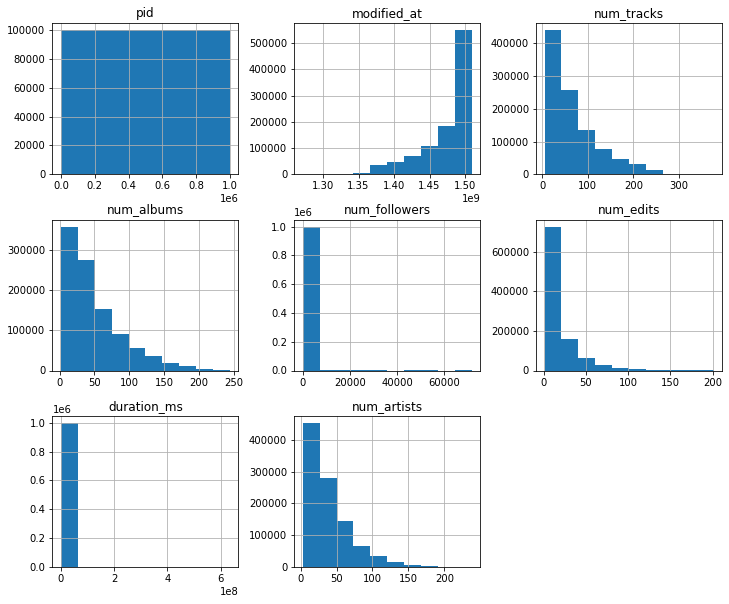

In [30]:
df_playlist.hist()
plt.show()

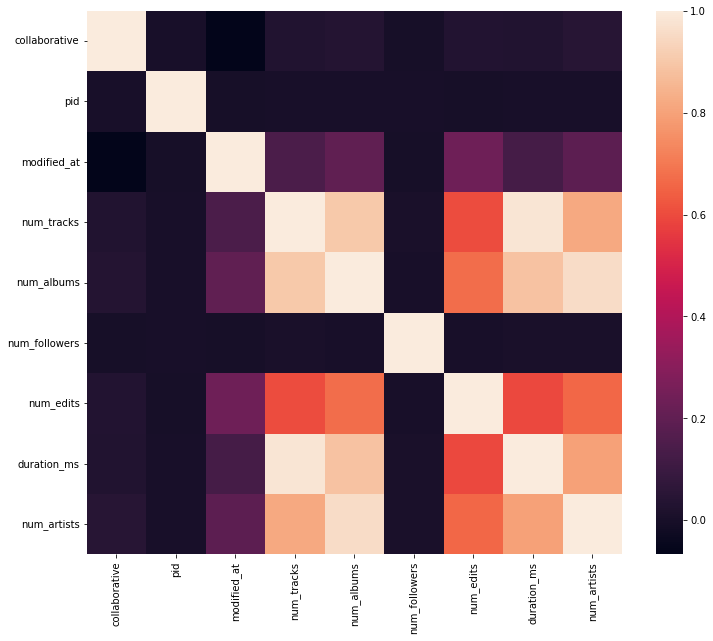

In [32]:
import seaborn as sns

sns.heatmap(df_playlist.corr())
plt.show()

### Можно извлечь ключевые слова из колонки name как фичи

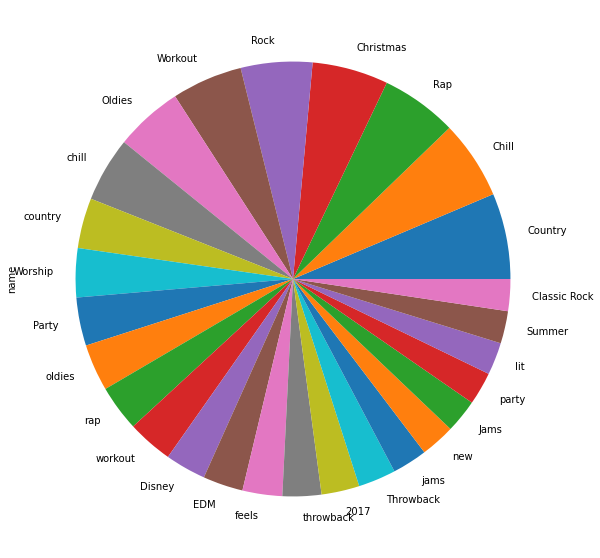

In [53]:
counts_name = df_playlist.name.value_counts() 
counts_name[counts_name > 2000].plot(kind='pie')
plt.show()

In [70]:
print("Процент collaborative плейлистов, т.е несколькими владельцами: {}%".format(round(100 * (df_playlist.collaborative == True).sum() / df_playlist.collaborative.size, 1)))

Процент плейлистов с несколькими владельцами: 2.3%
